### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from fast_ml.model_development import train_valid_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
%matplotlib inline

### Loading Data

In [5]:
df1 = pd.read_excel("Training Set _5822 records 86 attributes including Class.xlsx")

In [6]:
#Checking top 5 rows of the loaded data
df1.head()

,Unnamed: 0,MOSTYPE,MOSTYPE Description,MAANTHUI,MGEMOMV,MGEMLEEF,MGEMLEEF Description,MOSHOOFD,MOSHOOFD Description,MGODRK,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,NaN,33,MAUT2 2 cars,1,3,2,30-40 years,8,Family with grown ups,0,...,0,0,0,1,0,0,0,0,0,0
1,NaN,37,MINKM30 Income < 30.000,1,2,2,30-40 years,8,Family with grown ups,1,...,0,0,0,1,0,0,0,0,0,0
2,NaN,37,MINKM30 Income < 30.000,1,2,2,30-40 years,8,Family with grown ups,0,...,0,0,0,1,0,0,0,0,0,0
3,NaN,9,MGODGE No religion,1,3,3,40-50 years,3,Average Family,2,...,0,0,0,1,0,0,0,0,0,0
4,NaN,40,MINK7512 Income 75-122.000,1,4,2,30-40 years,10,Farmers,1,...,0,0,0,1,0,0,0,0,0,0


In [7]:
#dropping the unwanted first column from the dataset
df1 = df1.drop(['Unnamed: 0'],axis = 1)

In [8]:
df1.head(2)

,MOSTYPE,MOSTYPE Description,MAANTHUI,MGEMOMV,MGEMLEEF,MGEMLEEF Description,MOSHOOFD,MOSHOOFD Description,MGODRK,MGODRK Description,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,MAUT2 2 cars,1,3,2,30-40 years,8,Family with grown ups,0,0%,...,0,0,0,1,0,0,0,0,0,0
1,37,MINKM30 Income < 30.000,1,2,2,30-40 years,8,Family with grown ups,1,1 - 10%,...,0,0,0,1,0,0,0,0,0,0


### Data Exploration

In [9]:
df1.shape

(5822, 91)

There are 5,822 records in 91 columns

Checking for Null Values in the data

In [10]:
df1[df1.isnull().any(axis=1)]

,MOSTYPE,MOSTYPE Description,MAANTHUI,MGEMOMV,MGEMLEEF,MGEMLEEF Description,MOSHOOFD,MOSHOOFD Description,MGODRK,MGODRK Description,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN


There are no Null values in the data !

Also we can see categorical columns in the data. 

In [11]:
#Finding the list of categorical columns
cat_var1 = list(df1.filter(regex='Descrip'))

In [12]:
cat_var1

['MOSTYPE  Description',
 'MGEMLEEF  Description',
 'MOSHOOFD Description',
 'MGODRK Description',
 'PWAPART Description']

There are a total of 5 categorical variables in the data (alongwith 5 categorical class variables associated with these)
Let's see the unique count of values in the categorical variables

In [13]:
# Getting the unique count of values
df1[cat_var1].nunique()

MOSTYPE  Description     40
MGEMLEEF  Description     6
MOSHOOFD Description     10
MGODRK Description       10
PWAPART Description       4
dtype: int64

Let's see how the categorical variables affect the output variable

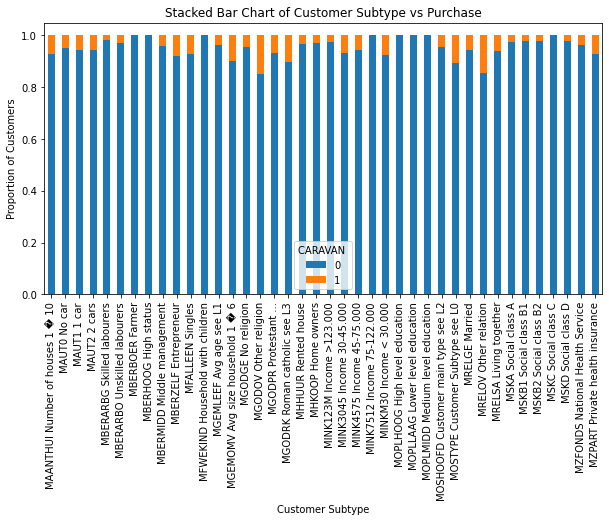

In [41]:
#from matplotlib.pyplot import figure
#%matplotlib inline

table=pd.crosstab(df1['MOSTYPE  Description'],df1['CARAVAN '])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Customer Subtype vs Purchase')
plt.xlabel('Customer Subtype')
plt.ylabel('Proportion of Customers')
plt.rcParams["figure.figsize"] = (5,10)

plt.show()
#plt.savefig('Customer Subtype vs Purchase')

As we can see from above graph, MOSTYPE seems a strong predictor for the outcome variable

We can also check the frequency distribution of the values in MOSTYPE

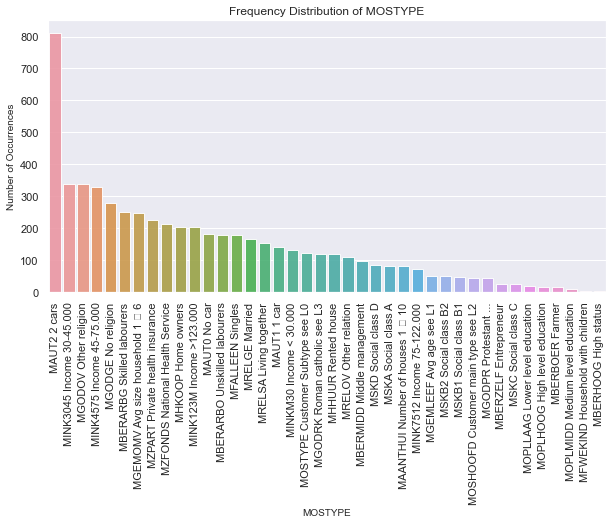

In [14]:
MOSTYPE_count = df1['MOSTYPE  Description'].value_counts()
sns.set(style="darkgrid")
sns.barplot(MOSTYPE_count.index, MOSTYPE_count.values,alpha = 0.9)
plt.title('Frequency Distribution of MOSTYPE')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('MOSTYPE', fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

As can be seen from the above graph, most of the population are having 2 cars

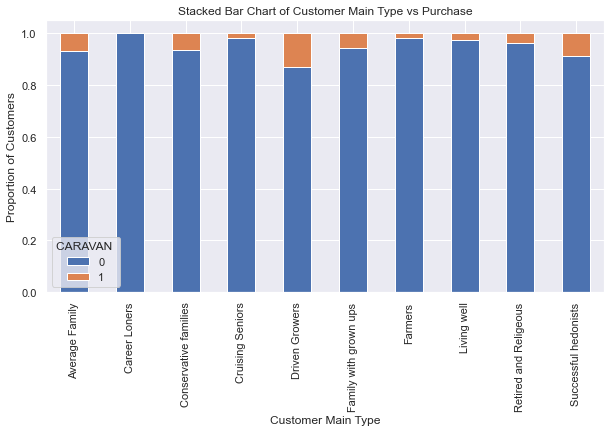

In [18]:
table=pd.crosstab(df1['MOSHOOFD Description'],df1['CARAVAN '])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Customer Main Type vs Purchase')
plt.xlabel('Customer Main Type')
plt.ylabel('Proportion of Customers')
plt.rcParams["figure.figsize"] = (5,10)
plt.show()

Customer Main Type also looks a strong predictor

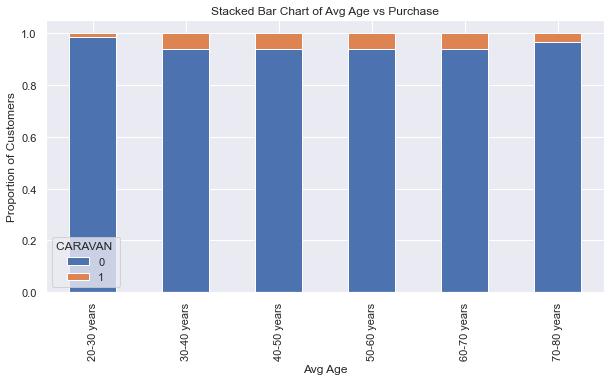

In [21]:
table=pd.crosstab(df1['MGEMLEEF  Description'],df1['CARAVAN '])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Avg Age vs Purchase')
plt.xlabel('Avg Age')
plt.ylabel('Proportion of Customers')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

There are very few customers with Caravan from the age 20-30 & 70-80. Other age groups have same distribution.

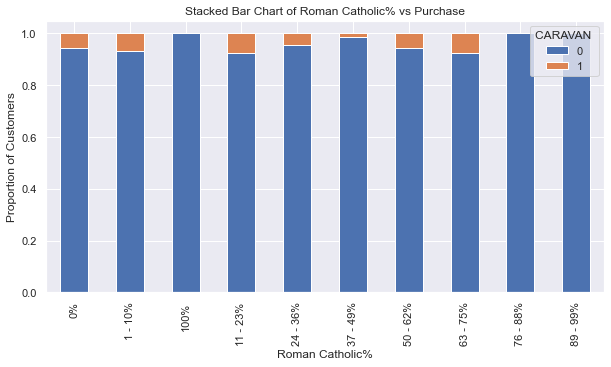

In [46]:
table=pd.crosstab(df1['MGODRK Description'],df1['CARAVAN '])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Roman Catholic% vs Purchase')
plt.xlabel('Roman Catholic%')
plt.ylabel('Proportion of Customers')
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

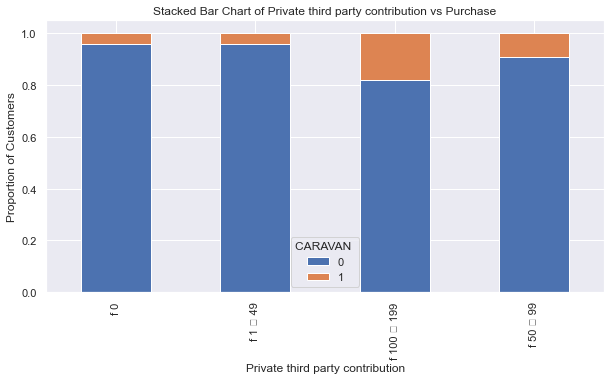

In [47]:
table=pd.crosstab(df1['PWAPART Description'],df1['CARAVAN '])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Private third party contribution vs Purchase')
plt.xlabel('Private third party contribution')
plt.ylabel('Proportion of Customers')
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

Private 3rd party contribution seems to be a strong predictor for outcome variable 

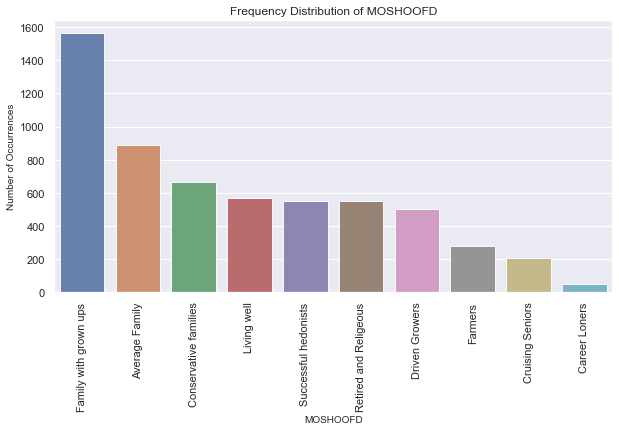

In [30]:
MOSHOOFD_count = df1['MOSHOOFD Description'].value_counts()
sns.set(style="darkgrid")
sns.barplot(MOSHOOFD_count.index, MOSHOOFD_count.values, alpha=0.9)
plt.title('Frequency Distribution of MOSHOOFD')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('MOSHOOFD', fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

Dropping the descriptive columns as they already have corresponding categorical class columns

In [14]:
df2 = df1[df1.columns.drop(list(df1.filter(regex='Descrip')))]

In [15]:
df2.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [16]:
df1.shape

(5822, 91)

In [17]:
df2.shape

(5822, 86)

Total 5 Descriptive columns deleted

### Seperating Categorical and continuous variables

In [18]:
categorical_features = ['MOSTYPE ','MGEMLEEF ','MOSHOOFD ','MGODRK ','PWAPART ']
df_cat = df2[categorical_features]
df_cat.head()

,MOSTYPE,MGEMLEEF,MOSHOOFD,MGODRK,PWAPART
0,33,2,8,0,0
1,37,2,8,1,2
2,37,2,8,0,2
3,9,3,3,2,0
4,40,2,10,1,0


Getting the continuous variables

In [19]:
output_column = ['CARAVAN ']
df_cont1 = df2.drop(categorical_features,axis = 1)
df_cont = df_cont1.drop(output_column,axis = 1)
df_cont.head()

,MAANTHUI,MGEMOMV,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,1,3,5,1,3,7,0,2,1,2,...,0,0,0,0,1,0,0,0,0,0
1,1,2,4,1,4,6,2,2,0,4,...,0,0,0,0,1,0,0,0,0,0
2,1,2,4,2,4,3,2,4,4,4,...,0,0,0,0,1,0,0,0,0,0
3,1,3,3,2,4,5,2,2,2,3,...,0,0,0,0,1,0,0,0,0,0
4,1,4,4,1,4,7,1,2,2,4,...,0,0,0,0,1,0,0,0,0,0


Checking the statistical information of the continuous variables

In [20]:
check = df_cont.describe().T
check

,count,mean,std,min,25%,50%,75%,max
MAANTHUI,5822.0,1.110615,0.405842,1.0,1.0,1.0,1.0,10.0
MGEMOMV,5822.0,2.678805,0.789835,1.0,2.0,3.0,3.0,5.0
MGODPR,5822.0,4.626932,1.715843,0.0,4.0,5.0,6.0,9.0
MGODOV,5822.0,1.069907,1.017503,0.0,0.0,1.0,2.0,5.0
MGODGE,5822.0,3.258502,1.597647,0.0,2.0,3.0,4.0,9.0
...,...,...,...,...,...,...,...,...
AZEILPL,5822.0,0.000515,0.022696,0.0,0.0,0.0,0.0,1.0
APLEZIER,5822.0,0.006012,0.081632,0.0,0.0,0.0,0.0,2.0
AFIETS,5822.0,0.031776,0.210986,0.0,0.0,0.0,0.0,3.0
AINBOED,5822.0,0.007901,0.090463,0.0,0.0,0.0,0.0,2.0


In [21]:
check[(check['max']==0)]

,count,mean,std,min,25%,50%,75%,max


No columns with 0 values as well !

### Checking for multicollinearity with correlation matrix among independent continuous variables

Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results. Logistic Regression or Linear Regression are not immune to that problem and we should fix it before training the model.

In [22]:
corrM = df_cont.corr()

In [23]:
corrM

,MAANTHUI,MGEMOMV,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
MAANTHUI,1.000000,0.010102,-0.024360,0.012056,0.020540,0.023025,-0.038566,-0.012544,0.032535,-0.082919,...,0.020926,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166
MGEMOMV,0.010102,1.000000,0.049356,-0.108650,-0.005527,0.534798,-0.175586,-0.500735,-0.659553,-0.315960,...,0.017428,-0.000128,0.016760,0.018749,-0.009269,0.009234,0.000644,0.030330,0.025907,0.028384
MGODPR,-0.024360,0.049356,1.000000,-0.317549,-0.741895,0.147256,-0.211031,-0.084051,-0.115922,0.066457,...,-0.018459,-0.014355,0.003949,0.003975,0.046352,0.013760,0.018468,0.001906,0.002392,0.016658
MGODOV,0.012056,-0.108650,-0.317549,1.000000,-0.139306,-0.125703,0.111762,0.105340,0.122198,0.022851,...,0.003050,0.006572,-0.005569,0.017696,0.006302,-0.023877,0.009417,0.025661,-0.009734,0.010127
MGODGE,0.020540,-0.005527,-0.741895,-0.139306,1.000000,-0.107900,0.159553,0.071838,0.064642,-0.086731,...,0.010169,0.008844,0.004242,-0.004139,-0.052605,-0.008412,-0.026407,-0.011122,0.007261,-0.027291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZEILPL,-0.006189,0.009234,0.013760,-0.023877,-0.008412,0.009711,-0.020771,-0.003829,-0.011199,0.010789,...,-0.004607,-0.001661,-0.001840,-0.001361,0.003902,1.000000,0.091052,-0.003420,0.081689,-0.002698
APLEZIER,0.000666,0.000644,0.018468,0.009417,-0.026407,-0.001566,0.019774,-0.006311,-0.018787,0.022004,...,-0.003797,0.023526,-0.005970,-0.004413,0.000177,0.091052,1.000000,-0.011093,0.040094,0.026325
AFIETS,-0.020993,0.030330,0.001906,0.025661,-0.011122,0.020921,-0.037474,-0.007909,-0.010051,-0.003323,...,0.003942,-0.011020,0.038345,-0.009025,-0.031095,-0.003420,-0.011093,1.000000,0.004845,0.009246
AINBOED,0.018304,0.025907,0.002392,-0.009734,0.007261,-0.003420,0.018396,-0.002602,-0.013539,-0.010076,...,0.032572,-0.006391,0.016501,-0.005234,0.026274,0.081689,0.040094,0.004845,1.000000,0.021273


Creating a heatmap of the matrix for fisrt 10 variables

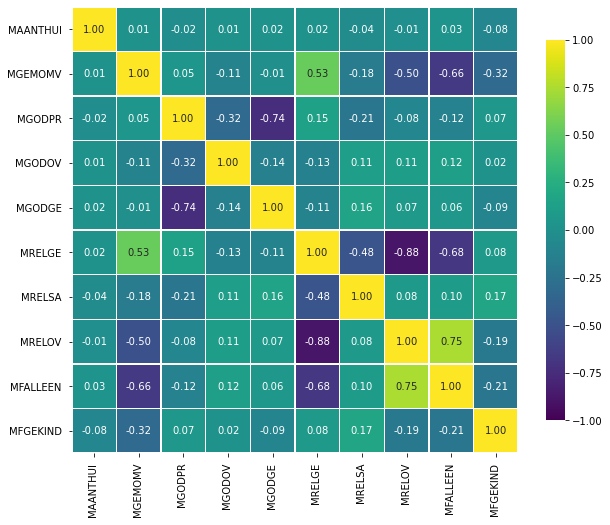

In [24]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations,vmin=-1.0, vmax=1.0, center=0, fmt='.2f',cmap="viridis",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df_cont.iloc[:, : 10])

From the first 10 continuous variables, we can see a strong correlation between MFALLEEN and MRELOV

Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [25]:
df_cont2 = df_cont.copy()

In [26]:
columns = np.full((corrM.shape[0],), True, dtype=bool)
for i in range(corrM.shape[0]):
    for j in range(i+1, corrM.shape[0]):
        if corrM.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_cont2.columns[columns]
df_cont2 = df_cont2[selected_columns]
df_cont2.head()

,MAANTHUI,MGEMOMV,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,...,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,ALEVEN,APERSONG,ABRAND,AZEILPL,AINBOED
0,1,3,5,1,3,7,0,2,1,2,...,0,0,0,0,0,0,0,1,0,0
1,1,2,4,1,4,6,2,2,0,4,...,0,0,0,2,0,0,0,1,0,0
2,1,2,4,2,4,3,2,4,4,4,...,0,0,0,1,0,0,0,1,0,0
3,1,3,3,2,4,5,2,2,2,3,...,0,0,0,0,0,0,0,1,0,0
4,1,4,4,1,4,7,1,2,2,4,...,0,0,0,0,0,0,0,1,0,0


Number of continuous variables reduced from 80 to 66

### Checking for the sampling of the output variable in our dataset

<AxesSubplot:ylabel='CARAVAN '>

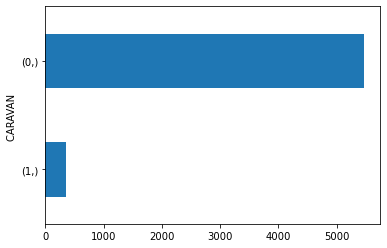

In [27]:
df2[output_column].value_counts().sort_values().plot(kind = 'barh')

In [28]:
Output_var_count = df2['CARAVAN '].value_counts()

In [29]:
Output_var_count

0    5474
1     348
Name: CARAVAN , dtype: int64

In [30]:
Output_var_count.index

Int64Index([0, 1], dtype='int64')

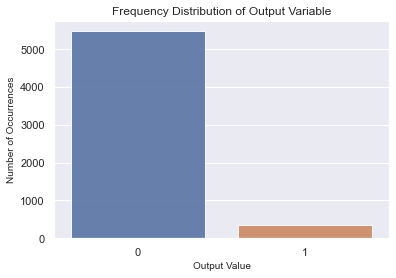

In [31]:
sns.set(style="darkgrid")
sns.barplot(Output_var_count.index, Output_var_count.values, alpha=0.9)
plt.title('Frequency Distribution of Output Variable')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Output Value', fontsize=10)
#plt.xticks(rotation=90)
#plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [32]:
count_no_sub = len(df2[df2['CARAVAN ']==0])
count_sub = len(df2[df2['CARAVAN ']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 94.02267262109241
percentage of subscription 5.977327378907591


In [33]:
count_no_sub

5474

In [34]:
count_sub

348

Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 94:6. 

In [35]:
#concatenating continuous and categorical variables
df_final = pd.concat([df_cont2,df_cat],axis=1)

In [36]:
df_final.head()

,MAANTHUI,MGEMOMV,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,...,ALEVEN,APERSONG,ABRAND,AZEILPL,AINBOED,MOSTYPE,MGEMLEEF,MOSHOOFD,MGODRK,PWAPART
0,1,3,5,1,3,7,0,2,1,2,...,0,0,1,0,0,33,2,8,0,0
1,1,2,4,1,4,6,2,2,0,4,...,0,0,1,0,0,37,2,8,1,2
2,1,2,4,2,4,3,2,4,4,4,...,0,0,1,0,0,37,2,8,0,2
3,1,3,3,2,4,5,2,2,2,3,...,0,0,1,0,0,9,3,3,2,0
4,1,4,4,1,4,7,1,2,2,4,...,0,0,1,0,0,40,2,10,1,0


Create dummy variables

In [37]:
for col in categorical_features:
    dummies = pd.get_dummies(df_final[col],prefix=col)
    df_final = pd.concat([df_final,dummies], axis =1)
    df_final.drop(col, axis=1, inplace = True)

In [38]:
df_final.head()

,MAANTHUI,MGEMOMV,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,...,MGODRK _4,MGODRK _5,MGODRK _6,MGODRK _7,MGODRK _8,MGODRK _9,PWAPART _0,PWAPART _1,PWAPART _2,PWAPART _3
0,1,3,5,1,3,7,0,2,1,2,...,0,0,0,0,0,0,1,0,0,0
1,1,2,4,1,4,6,2,2,0,4,...,0,0,0,0,0,0,0,0,1,0
2,1,2,4,2,4,3,2,4,4,4,...,0,0,0,0,0,0,0,0,1,0
3,1,3,3,2,4,5,2,2,2,3,...,0,0,0,0,0,0,1,0,0,0
4,1,4,4,1,4,7,1,2,2,4,...,0,0,0,0,0,0,1,0,0,0


In [39]:
output = df2['CARAVAN ']

In [40]:
data_final = pd.concat([df_final,output],axis=1)

In [41]:
data_final.rename(columns={'CARAVAN ':'y'}, inplace=True)

In [42]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

os = SMOTE(random_state=0)
#X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data_final, target = 'y', 
#                                                                            train_size=0.5, valid_size=0.3, test_size=0.2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  8772
Number of no subscription in oversampled data 4386
Number of subscription 4386
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [43]:
Output_var_count_new = os_data_y['y'].value_counts()
Output_var_count_new

0    4386
1    4386
Name: y, dtype: int64

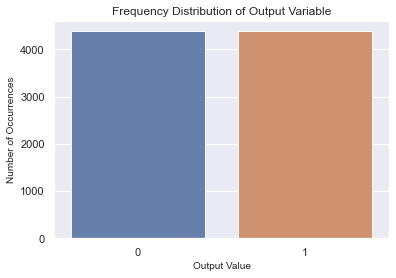

In [44]:
sns.set(style="darkgrid")
sns.barplot(Output_var_count_new.index, Output_var_count_new.values, alpha=0.9)
plt.title('Frequency Distribution of Output Variable')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Output Value', fontsize=10)
#plt.xticks(rotation=90)
#plt.rcParams["figure.figsize"] = (10,5)
plt.show()

Now we have a perfect balanced data! It's noticeable that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

To give equal importance to all features, we need to scale the continuous features using scikit-learn's MinMaxScaler as the feature matrix is a mix of both binary and continuous variables

In [45]:
mms = MinMaxScaler()
mms.fit(os_data_X)
os_data_X1 = mms.transform(os_data_X)
columns = os_data_X.columns
os_data_X1 = pd.DataFrame(os_data_X1,columns=columns)
os_data_X1.head()

,MAANTHUI,MGEMOMV,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,...,MGODRK _4,MGODRK _5,MGODRK _6,MGODRK _7,MGODRK _8,MGODRK _9,PWAPART _0,PWAPART _1,PWAPART _2,PWAPART _3
0,0.000000,0.25,0.444444,0.4,0.444444,0.777778,0.142857,0.222222,0.333333,0.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.25,0.555556,0.2,0.222222,0.444444,0.571429,0.222222,0.111111,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000000,0.50,0.444444,0.0,0.555556,1.000000,0.000000,0.000000,0.000000,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.75,0.555556,0.4,0.222222,0.555556,0.000000,0.444444,0.333333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.111111,0.25,0.333333,0.4,0.444444,0.222222,0.571429,0.333333,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [46]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X1, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False  True  True  True  True
  True  True False False False False False False False False False False
 False  True  True False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False False False False False False False
 False False False False False False False  True  True  True  True False
 False  True False False False False False False False False False False
  True False False False]
[110  32  51  52  48  59 106  60   1   1   1   1   1   1  38 117  13  41
  40  39  83  68  82 102  58   1   1 111  93  20   1   1  42 107  96 113
  30  43  89  88  57  28 

In [47]:
os_data_X1.columns[rfe.support_]

Index(['MFALLEEN ', 'MFGEKIND ', 'MFWEKIND ', 'MOPLHOOG ', 'MOPLMIDD ',
       'MOPLLAAG ', 'MHHUUR ', 'MHKOOP ', 'MZFONDS ', 'MZPART ', 'AWAPART ',
       'MOSTYPE _7', 'MOSTYPE _35', 'MOSTYPE _36', 'MOSHOOFD _4',
       'MOSHOOFD _5', 'MOSHOOFD _6', 'MOSHOOFD _7', 'MOSHOOFD _10',
       'PWAPART _0'],
      dtype='object')

In [48]:
cols=['MFALLEEN ', 'MFGEKIND ', 'MFWEKIND ', 'MOPLHOOG ', 'MOPLMIDD ',
       'MOPLLAAG ', 'MHHUUR ', 'MHKOOP ', 'MZFONDS ', 'MZPART ', 'AWAPART ',
       'MOSTYPE _7', 'MOSTYPE _35', 'MOSTYPE _36', 'MOSHOOFD _4',
       'MOSHOOFD _5', 'MOSHOOFD _6', 'MOSHOOFD _7', 'MOSHOOFD _10',
       'PWAPART _0']
X=os_data_X1[cols]
y=os_data_y['y']

### Model Implementation

In [49]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.481083
         Iterations: 35
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.306    
Dependent Variable:   y                  AIC:                8480.1180
Date:                 2021-12-11 12:48   BIC:                8621.7044
No. Observations:     8772               Log-Likelihood:     -4220.1  
Df Model:             19                 LL-Null:            -6080.3  
Df Residuals:         8752               LLR p-value:        0.0000   
Converged:            0.0000             Scale:              1.0000   
No. Iterations:       35.0000                                         
----------------------------------------------------------------------
              Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
----------------------------------------------------------------------
MFALLEEN      -6.5129    0.4179 -15.5833 0.0000     -7.3320    -5.6937
MFGEKIND      -6.9969    0.4478 -15.624

C:\Users\punit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Removing features with p value above 0.05

In [50]:
cols=['MFALLEEN ', 'MFGEKIND ', 'MFWEKIND ', 'MOPLHOOG ', 'MOPLMIDD ',
       'MOPLLAAG ', 'MHHUUR ', 'MHKOOP ', 'MZFONDS ', 'MZPART ', 'AWAPART ',
       'MOSTYPE _7', 'MOSTYPE _35', 'MOSTYPE _36', 
       'MOSHOOFD _5', 'MOSHOOFD _6', 'MOSHOOFD _7', 'MOSHOOFD _10',
       'PWAPART _0']
X=os_data_X1[cols]
y=os_data_y['y']

In [51]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.484365
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.301    
Dependent Variable: y                AIC:              8535.6979
Date:               2021-12-11 12:49 BIC:              8670.2050
No. Observations:   8772             Log-Likelihood:   -4248.8  
Df Model:           18               LL-Null:          -6080.3  
Df Residuals:       8753             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
MFALLEEN        -6.5941   0.4163 -15.8402 0.0000 -7.4101 -5.7782
MFGEKIND        -6.7903   0.4445 -15.2758 0.0000 -7.6615 -5.9190
MFWEKIND     

### Logistic Regression Model Fitting

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logreg.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on validation set: 0.93


In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_pred)
print(confusion_matrix)

[[1298   28]
 [ 160 1146]]


<AxesSubplot:>

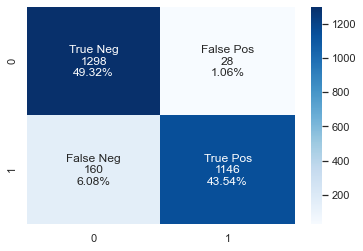

In [79]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [55]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1326
           1       0.98      0.88      0.92      1306

    accuracy                           0.93      2632
   macro avg       0.93      0.93      0.93      2632
weighted avg       0.93      0.93      0.93      2632



ROC Curve

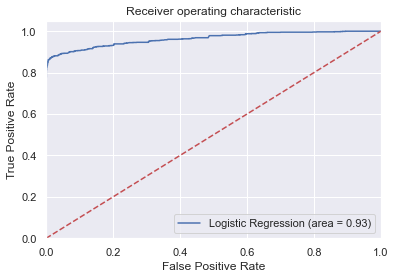

In [56]:
logit_roc_auc = roc_auc_score(y_test1, logreg.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, logreg.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Checking accuracy on Test Data

In [59]:
final_features = X.columns.to_list()
final_features

['MFALLEEN ',
 'MFGEKIND ',
 'MFWEKIND ',
 'MOPLHOOG ',
 'MOPLMIDD ',
 'MOPLLAAG ',
 'MHHUUR ',
 'MHKOOP ',
 'MZFONDS ',
 'MZPART ',
 'AWAPART ',
 'MOSTYPE _7',
 'MOSTYPE _35',
 'MOSTYPE _36',
 'MOSHOOFD _5',
 'MOSHOOFD _6',
 'MOSHOOFD _7',
 'MOSHOOFD _10',
 'PWAPART _0']

In [60]:
X_test2 = X_test[final_features]

In [62]:
data_X1 = mms.transform(X_test)
columns = X_test.columns
data_X1 = pd.DataFrame(data_X1,columns=columns)
data_X1.head()

,MAANTHUI,MGEMOMV,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,...,MGODRK _4,MGODRK _5,MGODRK _6,MGODRK _7,MGODRK _8,MGODRK _9,PWAPART _0,PWAPART _1,PWAPART _2,PWAPART _3
0,0.0,0.00,0.555556,0.0,0.444444,0.333333,0.142857,0.555556,0.777778,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.75,1.000000,0.0,0.000000,0.555556,0.000000,0.444444,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.50,0.444444,0.4,0.444444,0.888889,0.142857,0.111111,0.111111,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.50,0.444444,0.4,0.333333,0.666667,0.142857,0.222222,0.111111,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.25,0.555556,0.0,0.222222,1.000000,0.000000,0.000000,0.000000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [63]:
data_X1.shape

(1165, 136)

Test Data has 1165 rows as we took 20% of the original data as test data

In [64]:
X_test2 = data_X1[final_features]

In [65]:
y_test2 = y_test.copy()

In [66]:
y_test2.shape

(1165, 1)

In [67]:
y_pred2 = logreg.predict(X_test2)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logreg.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on validation set: 0.92


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test2, y_pred2)
print(confusion_matrix)

[[1068   20]
 [  72    5]]


In [70]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1088
           1       0.20      0.06      0.10        77

    accuracy                           0.92      1165
   macro avg       0.57      0.52      0.53      1165
weighted avg       0.89      0.92      0.90      1165



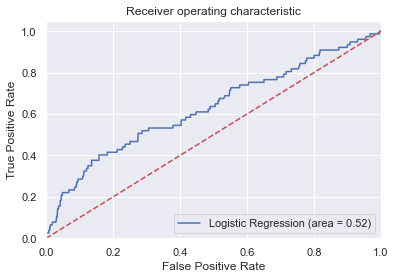

In [71]:
logit_roc_auc = roc_auc_score(y_test2, logreg.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test2, logreg.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [73]:
y_test2['y'].value_counts()

0    1088
1      77
Name: y, dtype: int64

### Confusion Matrix for Test Data Set

<AxesSubplot:>

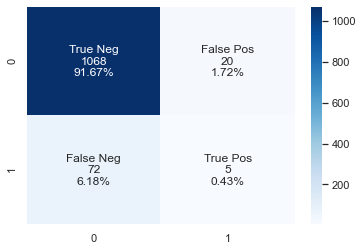

In [77]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')